In This notebook we have implemented Neural Network from the scratch. This file consists of 3 parts.

1. Implementation of Neual Network from Scratch
2. Use the NN for Image classification with CIFAR dataset
3. Use Batch Gradient Descent for NN training

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Mean error after 1 epoch is 0.5130975423761351
Mean error after 501 epoch is 0.496040887281652
Mean error after 1001 epoch is 0.49413693387171564
Mean error after 1501 epoch is 0.48942443252654233
Mean error after 2001 epoch is 0.479107104729385
Mean error after 2501 epoch is 0.45886382399085135
Mean error after 3001 epoch is 0.42299773625565146
Mean error after 3501 epoch is 0.3874118154569621
Mean error after 4001 epoch is 0.36231710767689757
Mean error after 4501 epoch is 0.3353045523472944
Mean error after 5001 epoch is 0.29272181060777386
Mean error after 5501 epoch is 0.25059481638058645
Mean error after 6001 epoch is 0.21882243305663954
Mean error after 6501 epoch is 0.19572835210480694
Mean error after 7001 epoch is 0.17856476864094845
Mean error after 7501 epoch is 0.16537735509599458
Mean error after 8001 epoch is 0.1549234014203775
Mean error after 8501 epoch is 0.14641254538888435
Mean error after 9001 epoch is 0.13932756316588887
Mean error after 9501 epoch is 0.1333185377

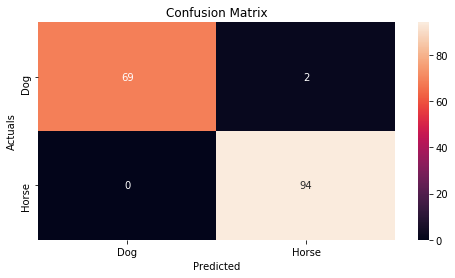

In [7]:
# Part 1 : In the part 1 we have implemented our Neural network with 1 hidden layer
from random import random


#initialize our neural network
class neural_net(object):

    def __init__(self, input_nodes, hidden_nodes, output_nodes = 1):
        
        '''
        
        This function has been written to initialize all the required weights and biases.
        This function takes desired input notes(equivalent to input size),hidden layer nodes and outpt nodes(default is 1)
        After that acording to the inputs we are initializing the values of weights.
        Random Initialization we have taken for weights ranges between (-1 to 1)
        
        This clearly shows that our model can handle any number of neuron inputs.
        '''
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.hidden_weights = np.random.rand(self.input_nodes, self.hidden_nodes)*2-1
        self.hidden_bias = np.random.rand(1,self.hidden_nodes)*2-1
        self.output_weights =np.random.rand(self.hidden_nodes, self.output_nodes)*2-1
        self.output_bias = np.random.rand(1,self.output_nodes)*2-1
                
    def sig(self, z): 
        '''
        This function takes the value and returns the sigmoid value of the input.
        
        '''
        return 1.0 / (1 + np.exp(-z))

    def der_sig(self,z):  
        '''
        This function takes the sigmoid value as input and return the derivative of the sigmoid value.
        
        '''
        
        return z * (1-z)
    
    def fit(self, X, Y,epoch,lr):
        
        '''
        This Function takes input training values, respective label values and number of desired epochs.
        We have implemented both Feed forward and back proagation in this method.
        
        '''
        for i in range(epoch):
            #Feedforward
            self.input = X
            self.hidden_layer = self.sig(np.dot(self.input, self.hidden_weights) + self.hidden_bias)
            self.output = self.sig(np.dot(self.hidden_layer, self.output_weights) + self.output_bias)
            
            '''
            Below code has been written to implement the back propagation for our neural network.
            '''
            #back propagation
    
            alpha = lr
            error_out = Y - self.output
            if (i%500) == 0 :
                print('Mean error after {n} epoch is {s}'.format(n = i+1,s=np.mean(np.abs(error_out))))
                
            delta_out = error_out * self.der_sig(self.output)
            out_weight_change = self.hidden_layer.T.dot(delta_out)
            
  
            delta_Layer2 = (delta_out.dot(self.output_weights.T)) * self.der_sig(self.hidden_layer)
            hidden_weight_change = self.input.T.dot(delta_Layer2) 
   
            self.output_weights = self.output_weights + (out_weight_change*alpha)
            self.hidden_weights = self.hidden_weights + (hidden_weight_change* alpha) 
            self.output_bias=self.output_bias + np.sum(delta_out,axis=0) * alpha
            self.hidden_bias=self.hidden_bias + np.sum(delta_Layer2,axis=0) * alpha
            
    def predict(self, X):
        '''
        
        This function basically takes the test data as input and returns probability vaue of output
        by forward feeding
        
        '''
        hidden = self.sig(np.dot(X, self.hidden_weights) + self.hidden_bias)
        output = self.sig(np.dot(hidden, self.output_weights) + self.output_bias)
        return np.round(output)
        
    def accuracy(self, Y_pred, Y_actual):
        '''
        This function basically takes the prdicted output by our model and the actual label value
        and calculates the accuracy of the model. Along with that it draws the confusion matrix.
        
        '''
        score = sum(Y_pred == Y_actual) / len(Y_actual)
        
        con_mat = confusion_matrix(Y_actual, Y_pred)
        df_con_mat = pd.DataFrame(con_mat, index = [i for i in ('Dog','Horse')],
                         columns = [i for i in ('Dog','Horse')])
        plt.figure(figsize = (8,4))
        sns.heatmap(df_con_mat, annot=True)
        plt.title('Confusion Matrix')
        plt.xlabel("Predicted")
        plt.ylabel("Actuals")
        
        print("Accuracy :", score * 100, "%")
        
# Part 2 : Testing on a simple dataset, we have tested our model on the given data set.
def main():
    '''
    Here we are reading the required file and splitting it to Train and test data
    Train data is used to train our model and Test data is required to see how our model basically 
    behaves to unseen data.
    
    We have used only 3 neurons in our hideen layer and we are getting a good accuracy for our unseen data.
    '''
    df = pd.read_csv("circles500.csv")
    y = np.array(df[['Class']])
    X = df.drop(df.columns[len(df.columns)-1], axis=1).values
    
    from sklearn.model_selection import train_test_split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 
    features_length=X_train.shape[1]
    neuron_at_hidden_layer= 3
    network = neural_net(features_length,neuron_at_hidden_layer,1)    
    network.fit(X_train, y_train, 10000,0.002)
    prediction = network.predict(X_test)
    
    network.accuracy(prediction, y_test)
    
if __name__ == '__main__':
    main()

#### Observation:

In the above experiment we have taken a single layer Neural network with 3 neuron in our hidden layer.
We have taken learning rate to be 0.002 and observe that the error rate is decreasing after evry epoch and 10000 epochs.On calculating the 
accuracy we have got a convincing 98.7% acuracy for our model.

From the confusion matrix, we can say that out of 71 images of dog our neural net is able to predict 70 of them correctly. And out of 94 images of horse it is able to predict 93 of them correctly.

In [5]:
# Part 3 : In this part we have basically tested our neural model on a complex data set of CIFAR 10

def unpickle(file):
    '''
    This function ha bee used from the CIFAR website to read the requiste file
    
    '''
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [7]:
'''
We are reading the batch 1 for our assignment.
As the batch a dictionary consists of 4 different Key vaulues :[b'batch_label', b'labels', b'data', b'filenames']
We are reading the data and labels for our model to train and test further.

As the data consists all the channels of the image we are seggregating the channels and taking onle Red channel
to Train our model and further test it.

Then We are normalizing the dataset by dividing it by 255.
'''
batch=unpickle("cifar-10-python\cifar-10-batches-py\data_batch_1")
print(batch.keys())
b1_data= batch[b'data']    
b1_labels = batch[ b'labels']

Red = b1_data[:,:1024]
Blue = b1_data[:,1025:2048]
Green = b1_data[:,2049:3072]
    
label = np.array([b1_labels])
New_label = label.T
#normalize Red
Red = Red/255
Dataset = np.append(Red,New_label,axis=1)
Hosrse= Dataset[Dataset[:,-1] == 7]
Dog = Dataset[Dataset[:,-1] == 5]
ys = np.concatenate((Dog,Hosrse),axis=0)
    
y = ys[:,[-1]]
for i in range(len(y)):
    if(y[i]==5):
        y[i]=0
    elif (y[i]==7) :
        y[i]=1
xs = np.delete(ys,-1,1)


dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


Mean error after 1 epoch is 0.5039817262560885
Mean error after 501 epoch is 0.3242600199388622
Mean error after 1001 epoch is 0.26074081046561226
Mean error after 1501 epoch is 0.21471343816054195
Mean error after 2001 epoch is 0.1876268374890087
Mean error after 2501 epoch is 0.1596332704232381
Accuracy : [64.53125] %


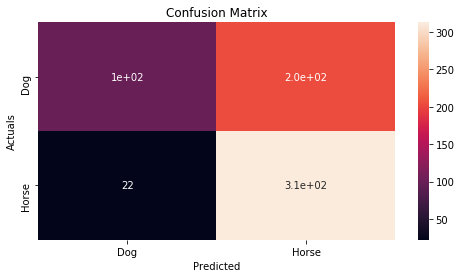

In [16]:

'''
Here we are reading ther equired file and splitting it to Train and test data
Train data is used to train our model and Test data is required to see how our model basically 
behaves to unseen data.
    
We have used 10(More than previous test) neurons in our hidden layer and we are getting a good accuracy for our unseen data.
'''

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.33, random_state=1) 
        
features_length=X_train.shape[1]
neuron_at_hidden_layer= 10
network = neural_net(features_length,neuron_at_hidden_layer)    
network.fit(X_train, y_train, 3000,0.004)
prediction = network.predict(X_test)
network.accuracy(prediction, y_test) 


#### Observation on Image Data:

As we fed the image data into our neural network, we have chosen epochs to be 3000 and learning rate to be 0.004.
As we can see in the above results, the mean error after each epoch is decreasing and we get a over all accuracy of 
64.5% for our unseen data.


####  Enhancements for Part 3 :

As part of enhancemnets I have implemented several  techniques as stated below
1. The first technique is the way of updating the weight through Gradient desecnt. In our initial model we were using whole 
   data set to calculate the error and accordingly doing the back propagation. But instead in our new model we have 
   implemented mini batch gradient descent. As in Stochastic GD we generally use one example at a time for updating the 
   weights which works very well in Large datasets but here we have selected 3 divided the total training data into 3 batches 
   and for each epoch we are feeding the Newural network with 3 time with 3 different batch inputs. And we with each batch 
   iteration it updates the weight.
2. Secondly I have created one more layer with dynamic neuron size.

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
The Mean error for epoch 1 batch 1 is 0.5213292358897813
The Mean error for epoch 1 batch 2 is 0.49252364887828004
The Mean error for epoch 1 batch 3 is 0.44154426898984683
The Mean error for epoch 1001 batch 1 is 0.18432205555113315
The Mean error for epoch 1001 batch 2 is 0.21634457508160027
The Mean error for epoch 1001 batch 3 is 0.22582838507795677
The Mean error for epoch 2001 batch 1 is 0.07825436796730874
The Mean error for epoch 2001 batch 2 is 0.09332765347748335
The Mean error for epoch 2001 batch 3 is 0.10482246059345796
The Mean error for epoch 3001 batch 1 is 0.04303763608933329
The Mean error for epoch 3001 batch 2 is 0.049570466565500695
The Mean error for epoch 3001 batch 3 is 0.05941055871181722
The Mean error for epoch 4001 batch 1 is 0.028324545889734383
The Mean error for epoch 4001 batch 2 is 0.03222978487665901
The Mean error for epoch 4001 batch 3 is 0.043011449190156724
Accuracy:  [70.9375] %


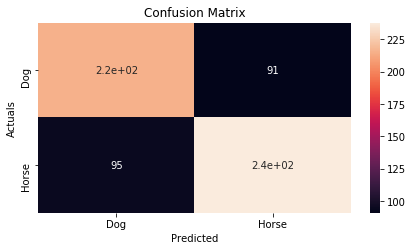

In [26]:
from random import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#initialize a network

class Neural_net_BG(object):
    def __init__(self, input_nodes, hidden_nodes1,hidden_nodes2,output_nodes = 1):
        self.input_nodes = input_nodes
        self.hidden_nodes1 = hidden_nodes1
        self.hidden_nodes2 = hidden_nodes2
        self.output_nodes = output_nodes
        
        self.hidden_weights1 = 2*np.random.rand(self.input_nodes, self.hidden_nodes1)-1
        self.hidden_bias1 = 2*np.random.rand(1,self.hidden_nodes1)-1
        self.hidden_weights2 = 2*np.random.rand(self.hidden_nodes1, self.hidden_nodes2)-1
        self.hidden_bias2 = 2*np.random.rand(1,self.hidden_nodes2)-1
        self.output_weights = 2*np.random.rand(self.hidden_nodes2, self.output_nodes)-1
        self.output_bias = 2* np.random.rand(1,self.output_nodes)-1
    
    def sig(self, z): 
        return 1.0 / (1 + np.exp(-z))

    def der_sig(self,z):    
        return z * (1-z)      
    
    def fit(self, X, Y,epoch,lr):
        self.errors= []
        for i in range(epoch):
            
            #Initializing the mini batch gradient variables
            self.itern  = 3     
            self.batch_start = 0
            self.batch_end = 450
            
            for j in range (self.itern):
                x_batch = X[self.batch_start:self.batch_end]
                y_batch = Y[self.batch_start:self.batch_end]

                #Feedforward
                self.input = x_batch
                self.hidden_layer1 = self.sig(np.dot(self.input, self.hidden_weights1) + self.hidden_bias1)
                self.hidden_layer2 = self.sig(np.dot(self.hidden_layer1, self.hidden_weights2) + self.hidden_bias2)
                self.output = self.sig(np.dot(self.hidden_layer2, self.output_weights) + self.output_bias)
                #back propagation

                alpha = lr
                error_out  = y_batch - self.output
                if (i%1000) == 0 :
                    print('The Mean error for epoch {a} batch {b} is {s}'.format(a=i+1,b=j+1,s=np.mean(np.abs(error_out))))

                delta_out = error_out * self.der_sig(self.output)
                ow_change = self.hidden_layer2.T.dot(delta_out) * alpha

                error_layer2 = delta_out.dot(self.output_weights.T)
                layer2_delta = error_layer2 * self.der_sig(self.hidden_layer2)
                layer2w_change =  self.hidden_layer1.T.dot(layer2_delta)* alpha 


                error_layer1 = layer2_delta.dot(self.hidden_weights2.T) 
                layer1_delta = error_layer1 * self.der_sig(self.hidden_layer1)
                layer1w_change = self.input.T.dot(layer1_delta) * alpha 

                self.output_weights = self.output_weights + ow_change
                self.hidden_weights2 = self.hidden_weights2 +layer2w_change
                self.hidden_weights1 = self.hidden_weights1 +layer1w_change

                self.output_bias=self.output_bias + np.sum(delta_out,axis=0) * alpha
                self.hidden_bias2=self.hidden_bias2 + np.sum(layer2_delta,axis=0) * alpha
                self.hidden_bias1=self.hidden_bias1 + np.sum(layer1_delta,axis=0) * alpha
                self.batch_start += 450  # Updating the batch size details
                self.batch_end += 450
   
    def predict(self, X):
        
        hidden1 = self.sig(np.dot(X, self.hidden_weights1) + self.hidden_bias1)
        hidden2 = self.sig(np.dot(hidden1, self.hidden_weights2) + self.hidden_bias2)
        output = self.sig(np.dot(hidden2, self.output_weights) + self.output_bias)

        return np.where(output>0.5,1,0)
        
    def accuracy(self, Y_pred, Y_actual):
        
        score = sum(Y_pred == Y_actual) / len(Y_actual)
        print("Accuracy: ",score*100, "%")
        
        con_mat = confusion_matrix(Y_actual, Y_pred)
        df_con_mat = pd.DataFrame(con_mat, index = [i for i in ('Dog','Horse')],
                         columns = [i for i in ('Dog','Horse')])
        plt.figure(figsize = (7,3.5))
        sns.heatmap(df_con_mat, annot=True)
        plt.title('Confusion Matrix')
        plt.xlabel("Predicted")
        plt.ylabel("Actuals")

    
batch=unpickle("cifar-10-python\cifar-10-batches-py\data_batch_1")
print(batch.keys())
b1_data= batch[b'data']    
b1_labels = batch[ b'labels']

Red = b1_data[:,:1024]
Blue = b1_data[:,1025:2048]
Green = b1_data[:,2049:3072]
    
label = np.array([b1_labels])
New_label = label.T
#normalize Red
Red = Red/255
Dataset = np.append(Red,New_label,axis=1)
Hosrse= Dataset[Dataset[:,-1] == 7]
Dog = Dataset[Dataset[:,-1] == 5]
ys = np.concatenate((Dog,Hosrse),axis=0)
    
y = ys[:,[-1]]
for i in range(len(y)):
    if(y[i]==5):
        y[i]=0
    elif (y[i]==7) :
        y[i]=1
xs = np.delete(ys,-1,1)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.33, random_state=42) 
    
    
features_length=X_train.shape[1]
neuron_at_hidden_layer1= 100
neuron_at_hidden_layer2 = 52
nn = Neural_net_BG(features_length,neuron_at_hidden_layer1,neuron_at_hidden_layer2,1)    
nn.fit(X_train, y_train, 5000,0.001)
prediction = nn.predict(X_test)
nn.accuracy(prediction, y_test) 

The accuracy of our enhaced model is 70% which is more than our initial model

References: 

[1] : https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a

[2] : 1920-CT5133 Deep Learning - Learning Materials
